In [1]:
# price predition of airbnb

In [2]:
# importing libaries of python which we are going to use in this project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("Airbnb NYC 2019.csv")

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# This function returns first 5 rows from the object based on position.

In [7]:
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
# This function returns last 5 rows from the object based on position.
# It is useful for quickly verifying data

In [9]:
df.shape

(48895, 16)

In [10]:
# shape shows how many rows and columns in datasets

In [11]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

 The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [12]:
# returns the DataFrame columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
#  returns description of the data in the DataFrame
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


 If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.

In [14]:
# Finding missing values of dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 count the number of missing values in each row and column by calling sum() from the result of isnull() . You can count missing values in each column by default, and in each row with axis=1

In [15]:
# missing values count of columns and their datatpyes
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("______________________________")
        
        print("{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

______________________________
name :- 16,  dtypes : object
______________________________
host_name :- 21,  dtypes : object
______________________________
last_review :- 10052,  dtypes : object
______________________________
reviews_per_month :- 10052,  dtypes : float64


In [ ]:
## Due to some reasons the column host_name' as well as 'id' will be droped. 
# The column 'last_review' seems likewise insignificant, so it won't be kept.

In [34]:
df1 = df[['host_id', 'name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
print('After dropping insignificant columns, the dataset has now {} rows and {} columns'.format(*df1.shape))

After dropping insignificant columns, the dataset has now 48895 rows and 13 columns


In [36]:
#Checking for missing values and dtypes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [37]:
df1.isnull().sum()

host_id                               0
name                                 16
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [38]:
print((df1.columns[df1.isnull().any()].tolist()))

['name', 'reviews_per_month']


In [39]:
#Filling missing values in column ['reviews_per_month'] with an average value
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(df1['reviews_per_month'].mean())
#Taking the rows in column ['name'], which are not NA
df1_clean = df1[df1['name'].notna()]
df1_clean.isnull().sum()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_110424/625036609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews_per_month'] = df1['reviews_per_month'].fillna(df1['reviews_per_month'].mean())


host_id                           0
name                              0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [40]:
df1_clean.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887900e+04,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000,48879.000000
mean,6.763013e+07,40.728945,-73.952168,152.722355,7.011027,23.281205,1.373371,7.145891,112.788989
std,7.862070e+07,0.054529,0.046160,240.186804,20.016000,44.556149,1.497958,32.957738,131.613322
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.816856e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079133e+07,40.723080,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763110,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [41]:
df1_clean.columns

Index(['host_id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [42]:
df1_clean.neighbourhood_group.unique().tolist()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [43]:
df1_clean.room_type.unique().tolist()

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#Visualizing a Categorical Data

In [44]:
df1_clean['neighbourhood_group'].value_counts().reset_index()

,index,neighbourhood_group
0,Manhattan,21652
1,Brooklyn,20098
2,Queens,5666
3,Bronx,1090
4,Staten Island,373


In [45]:
#Lets make it more nicer and show the numbers in percentage as well
nbh_grp = df1_clean['neighbourhood_group'].value_counts().reset_index()
nbh_grp.columns = ['Neighbourhood_Group', 'Count']
nbh_grp['in %'] = nbh_grp['Count']/nbh_grp['Count'].sum()*100
nbh_grp

,Neighbourhood_Group,Count,in %
0,Manhattan,21652,44.297142
1,Brooklyn,20098,41.117862
2,Queens,5666,11.591890
3,Bronx,1090,2.229997
4,Staten Island,373,0.763109


In [49]:
rm_type = df1_clean['room_type'].value_counts().reset_index()
rm_type.columns = ['Room_Types','Count']
rm_type['in %'] = rm_type['Count']/rm_type['Count'].sum()*100
rm_type

,Room_Types,Count,in %
0,Entire home/apt,25402,51.969148
1,Private room,22318,45.659690
2,Shared room,1159,2.371161


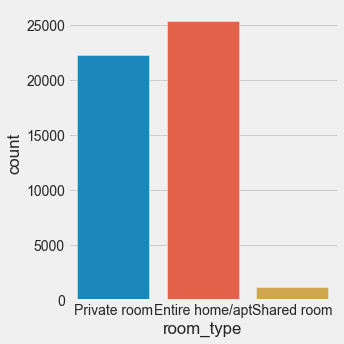

In [50]:
sns.catplot(x = 'room_type', kind = 'count', data = df1_clean)

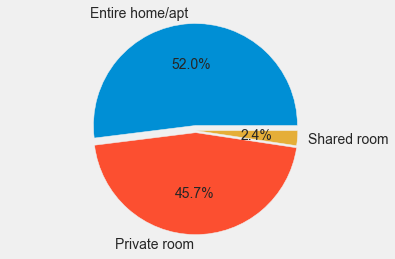

In [51]:
labels = rm_type.Room_Types.tolist()
sizes = rm_type['in %'].tolist()
explode = (0.05, 0.02, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')

plt.show()

In [ ]:
#Visualizing Numerical Data 

In [52]:
df1_clean.host_id.value_counts().head(5)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [53]:
avg_price_room_type = df1_clean.groupby(["room_type"])['price'].mean()
avg_price_room_type

room_type
Entire home/apt    211.788048
Private room        89.786630
Shared room         70.075928
Name: price, dtype: float64

In [54]:
price = df1_clean['price']
num_revws = df1_clean['number_of_reviews']
num_revws

0          9
1         45
2          0
3        270
4          9
        ... 
48890      0
48891      0
48892      0
48893      0
48894      0
Name: number_of_reviews, Length: 48879, dtype: int64

Univariate Analysis

Different Neighbourhood groups

The following plot represents the count of Airbnb's in the different neighbourhood groups. From the plot, we can easily visualize that maximum number of houses or apartments listed on Airbnb is in

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


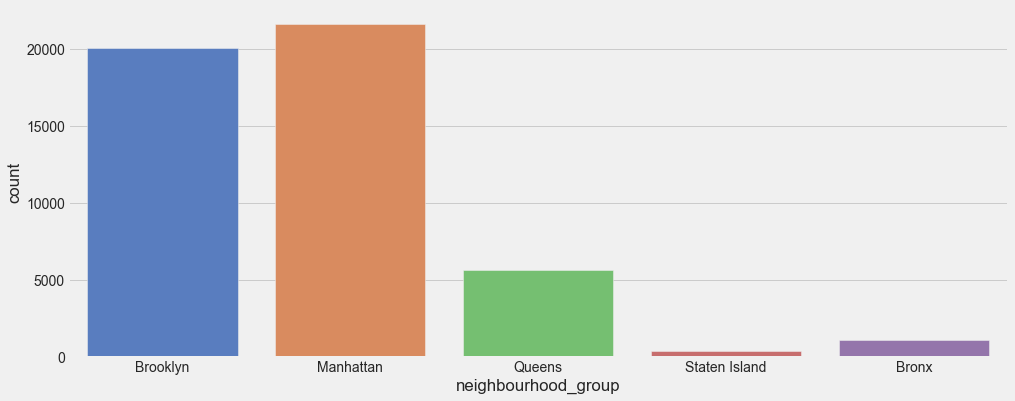

In [55]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group,palette="muted")
plt.show()

Price Distribution of Airbnb in Brooklyn

The price distribution of Airbnb in Brooklyn averages around 70-500 dollars per night depending upon the neighbourhood.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


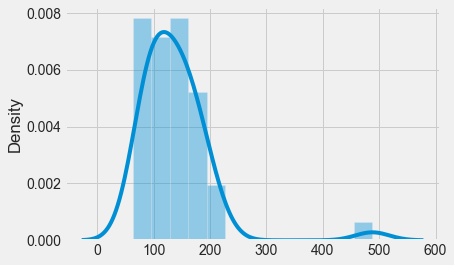

In [57]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


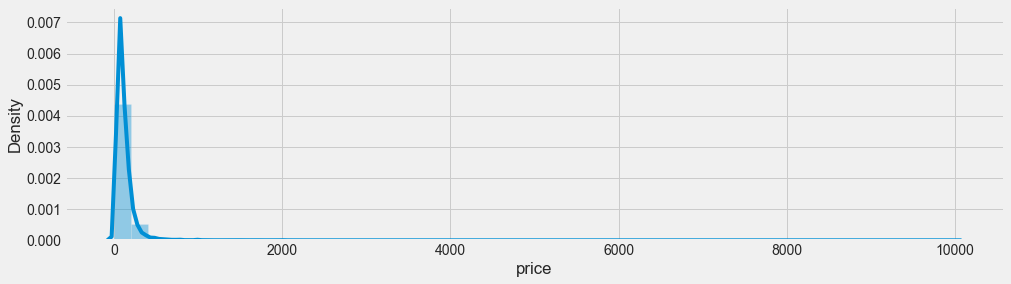

In [58]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

Price Distribution of Airbnb in Manhattan

The price distribution of Airbnb in Manhattan averages around 80-490 dollars per night depending upon the neighbourhood.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


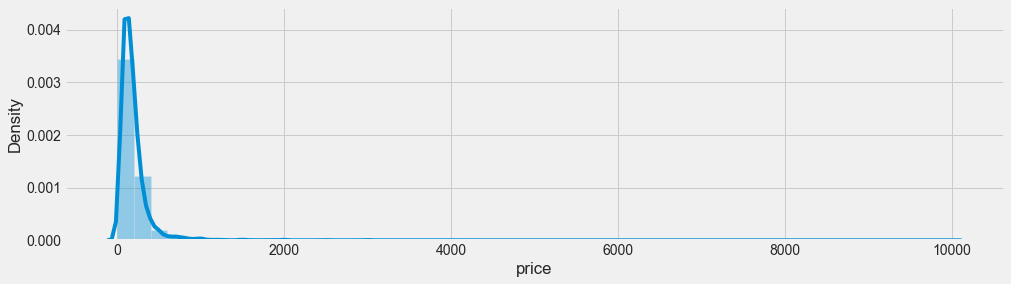

In [59]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

Price Distribution of Airbnb in Queens

The price distribution of Airbnb in Queens averages around 60-280 dollars per night depending upon the neighbourhood.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


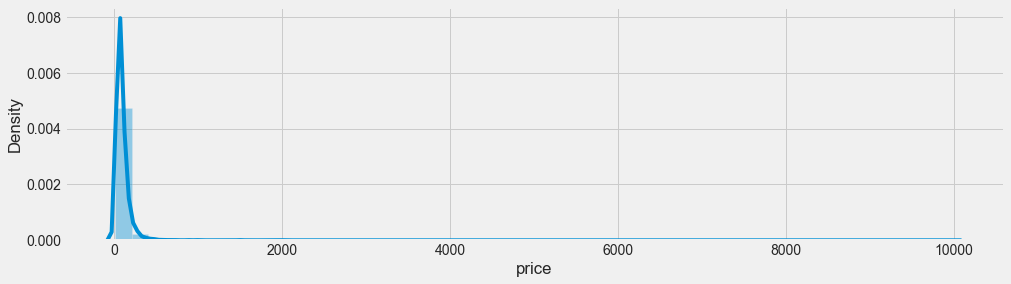

In [60]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()

Price Distribution of Airbnb in Staten Island

The price distribution of Airbnb in Staten Islands averages around 50-800 dollars per night depending upon the neighbourhood.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


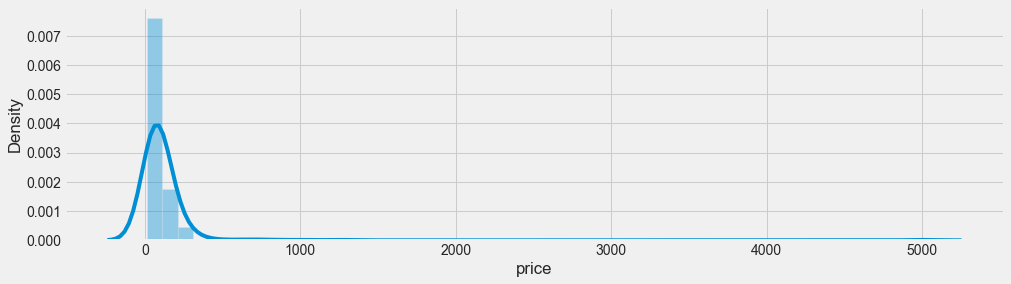

In [61]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()

Price Distribution of Airbnb in Bronx

The price distribution of Airbnb in Bronx averages around 50-450 dollars per night depending upon the neighbourhood.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


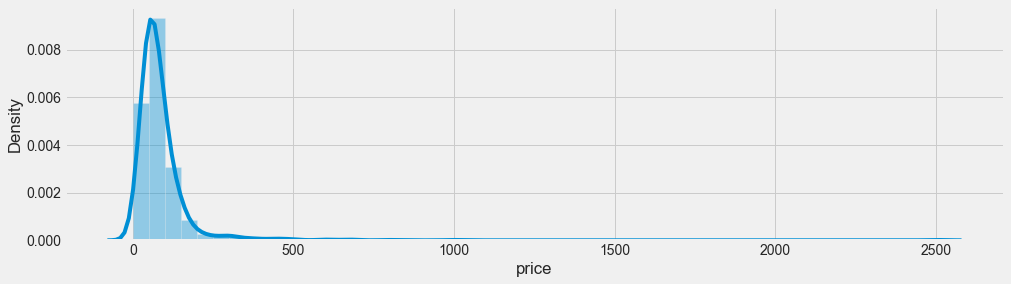

In [62]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()

Number of different room types

The maximum number of rooms listed on Airbnb are private rooms and entire home and apartments and a very small 
number of shared rooms are listed on Airbnb.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


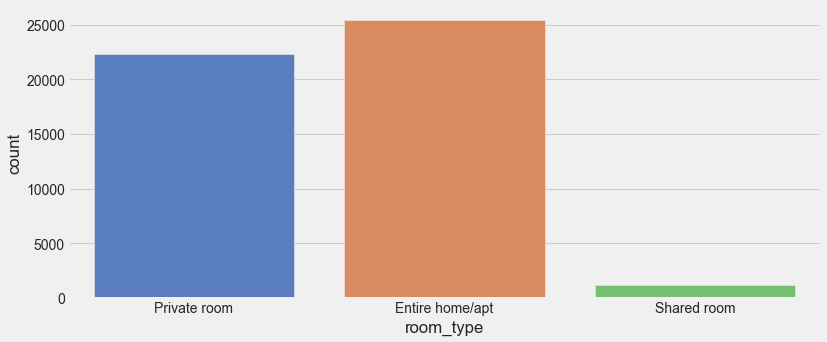

In [63]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()

Price Distribution of Private rooms

Private rooms on average are prised from 60-120 dollars per night on an average depending upon the neghbourhood group
it is loacted.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


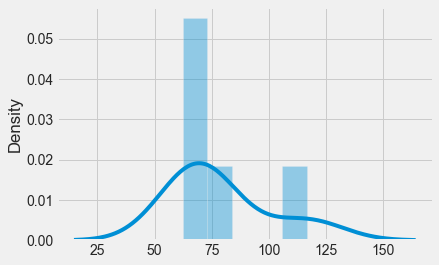

In [64]:
df1 = df[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


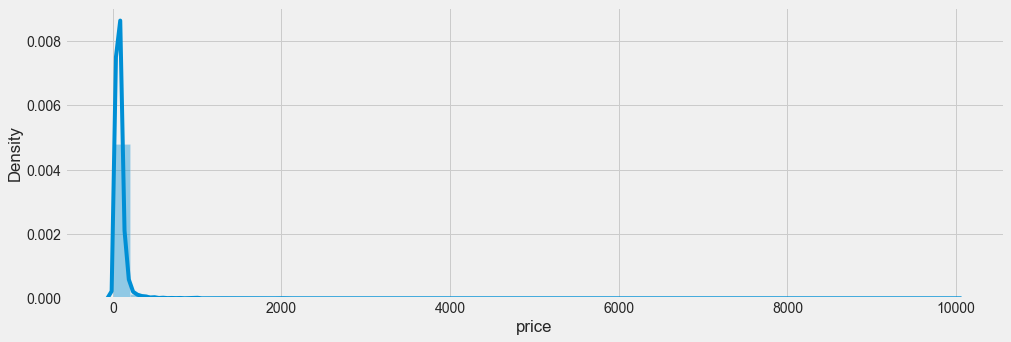

In [65]:
df1 = df[df.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Price Distribution of Shared rooms

Most of the shared rooms have the price range between 50-70 dollars per night depending upon the neighbourhood groups.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


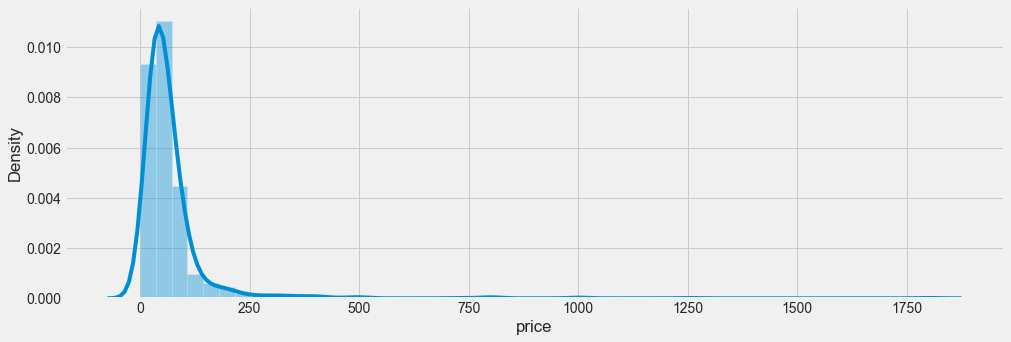

In [66]:
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Price Distribution of Entire home/apt

The average price of entire home or apartment varies from 120-250 dollars per night depending upon the neighbourhood
they given house is situated.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


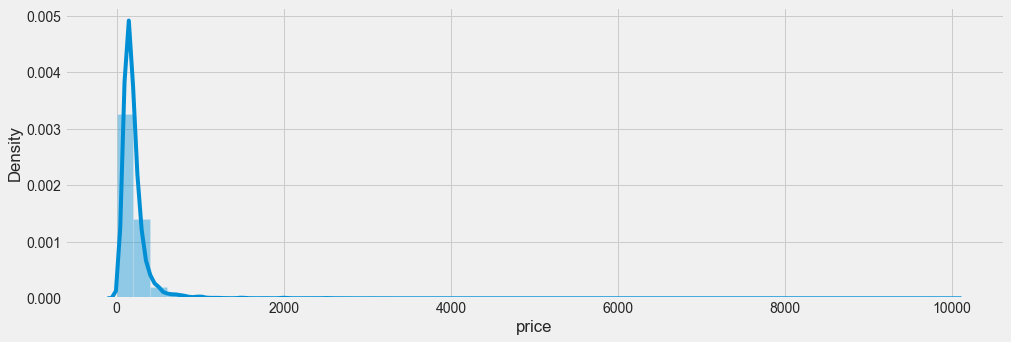

In [67]:
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Distribution of Reviews per month

Most of the houses listed on Airbnb has an average of around 1-10 reviews a month and this number may vary sometimes
even upto 50.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


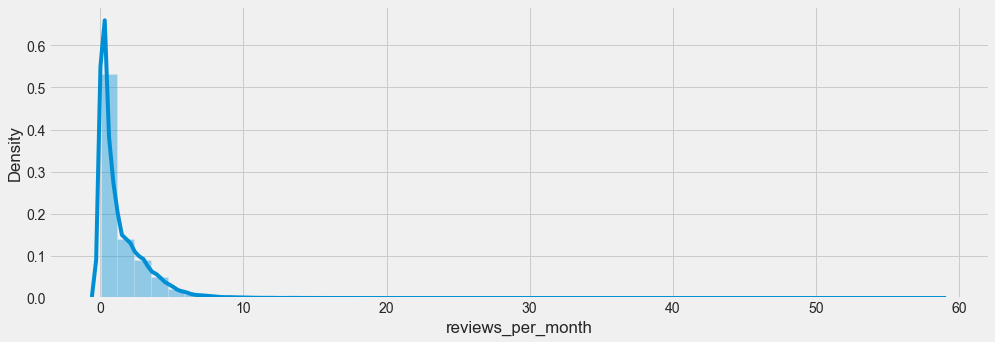

In [68]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.reviews_per_month)
plt.show()

Distribution of Availability of rooms

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


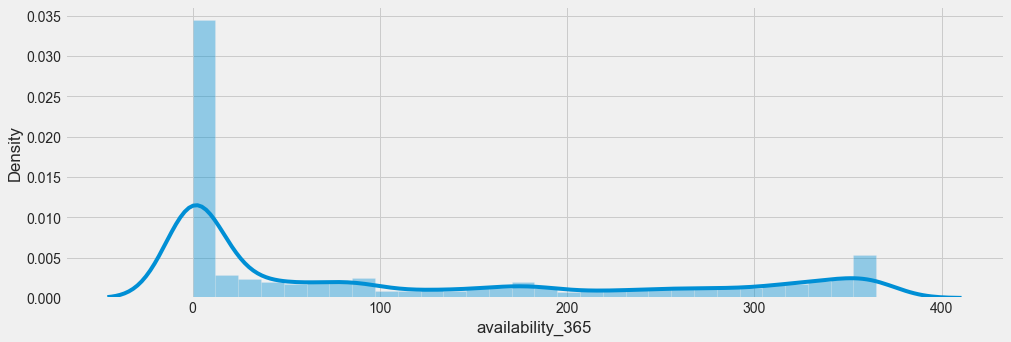

In [69]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.availability_365)
plt.show()

The availability of rooms in different neighbourhood groups and ranges from 0-360.

Minimum nights people stay in different room types

In the private roooms people mostly stay for around 1-7 days depending upon the neighbourhood groups.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.0% of the p

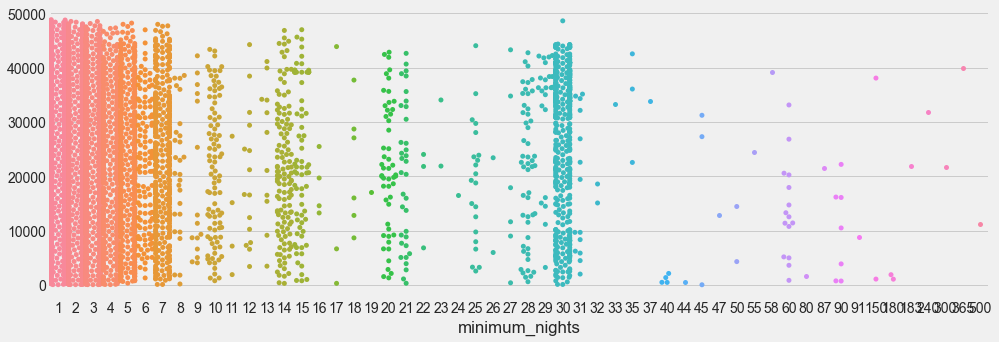

In [115]:
df1 = df[df.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

Mostly travellers, backpackers and people on low budget like to stay in the shared rooms. 
They live on an average of 1-2 days as they keep on moving from one place to another.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


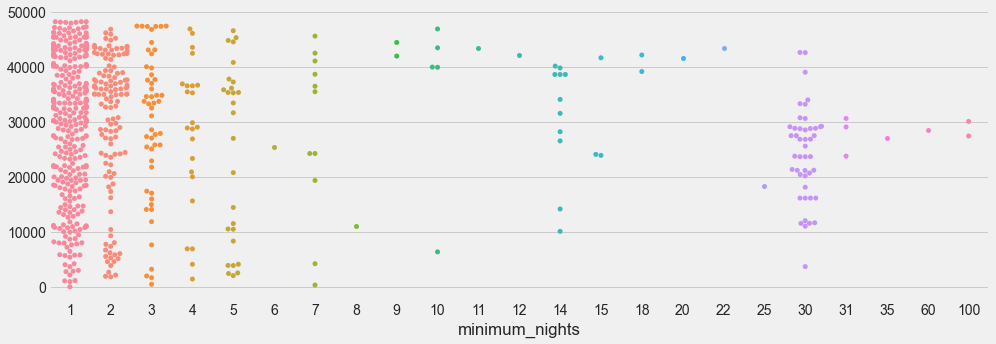

In [116]:
df1 = df[df.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

People like to travel with their families or friends and stay in complete homes or flats because there are less constraints. 
In these residences, they are permitted to cook their own food if they choose.
People often reside in these apartments for 1 to 90 days.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


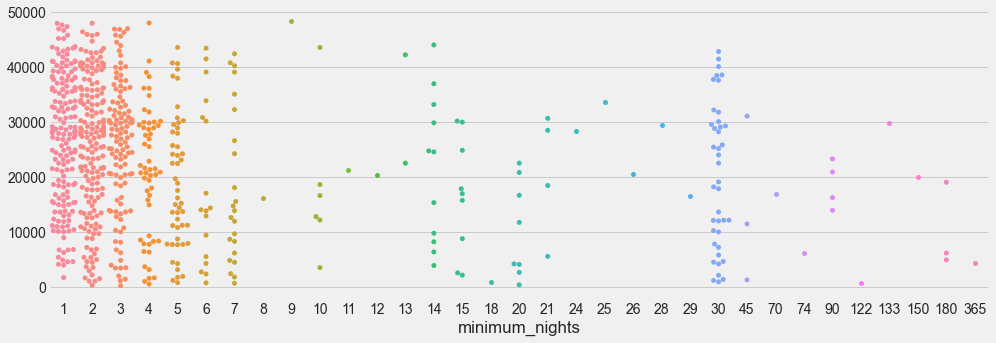

In [117]:
df1 = df[df.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

##Bivariate Analysis

Longitude vs Latitude (representing different neighbourhood groups)

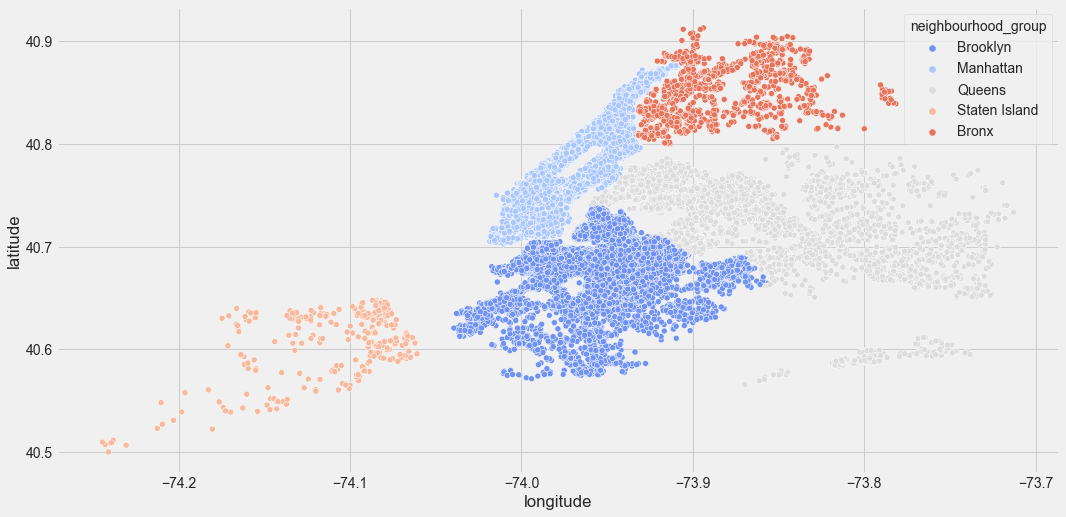

In [78]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

Longitude vs Latitude (representing availability of rooms)

The the given plot we can visualize the number of rooms available in different neighbourhood groups

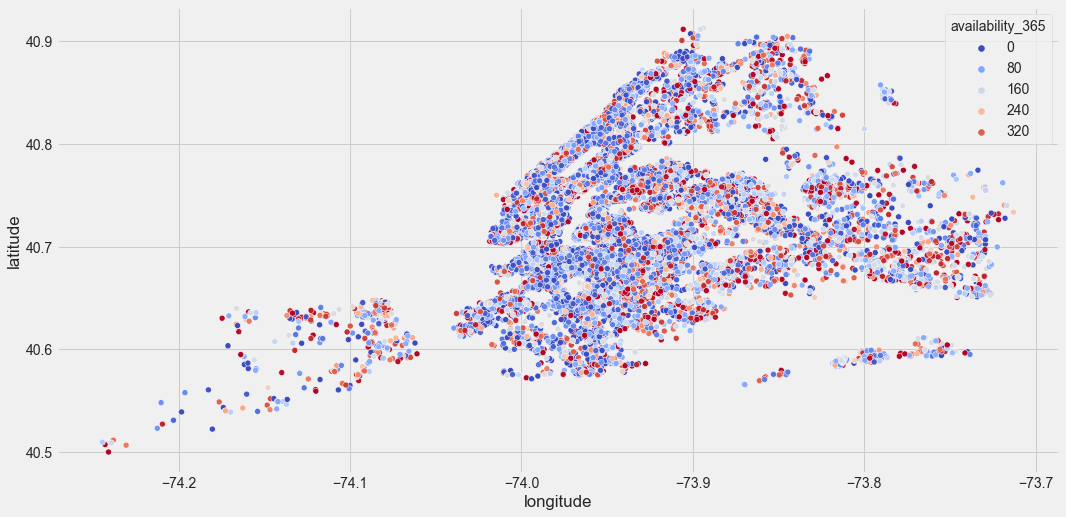

In [79]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

Top 10 most popular Airbnb hosts

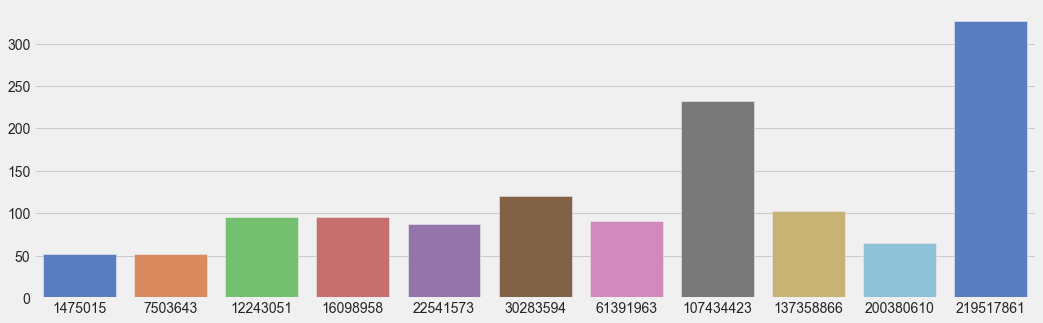

In [80]:
df1 = df.host_id.value_counts()[:11]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()

This is the list of top 10 most popular host in the given neighbourhood groups.
Maximum number of people love to stay at their place. The reason behind their popularity may depend upon the price,
neighbourhood, cleanliness and many more.

 stastical analysis

In [81]:
df['reviews_per_month'].head(10)

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

In [82]:
df['reviews_per_month'].mean()

1.3732214298586884

We have two options because there are so many null values in the columns "last review" and "reviews per month" (10052),
forward or backward filling to impute the values, or dropping those rows. The issue with forward or backward fill is that, 
in the case of the column "reviews per month," if the value immediately following the null value is large
(like the example above's value of 4.64), but the actual number of reviews per month for that apartment was close to zero,
 then we are performing forward fill in that null value incorrectly. The justification is the same for both columns.
 Therefore, it makes more sense to remove the rows 
with null values since doing so will prevent the data from suffering from the Curse of Dimensionality.

In [83]:
df = df.dropna()

In [84]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Outlier Treatment

In [85]:
df['price'].describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

The variable 'price' contains large outliers. Therefore, to improve the normality of data, we will take the data between
25th percentile and 75th percentile, thereby eliminating the effects of outliers

In [86]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR=Q3-Q1
df = df[~((df['price']<(Q1-1.5*IQR))|(df['price']>(Q3+1.5-IQR)))]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10922 entries, 6 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10922 non-null  int64  
 1   name                            10922 non-null  object 
 2   host_id                         10922 non-null  int64  
 3   host_name                       10922 non-null  object 
 4   neighbourhood_group             10922 non-null  object 
 5   neighbourhood                   10922 non-null  object 
 6   latitude                        10922 non-null  float64
 7   longitude                       10922 non-null  float64
 8   room_type                       10922 non-null  object 
 9   price                           10922 non-null  int64  
 10  minimum_nights                  10922 non-null  int64  
 11  number_of_reviews               10922 non-null  int64  
 12  last_review                     

### Statistical Analysis

Testing the assumptions:
Randomness of Data
Normality Test
Variance Test
The target variable being the price.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


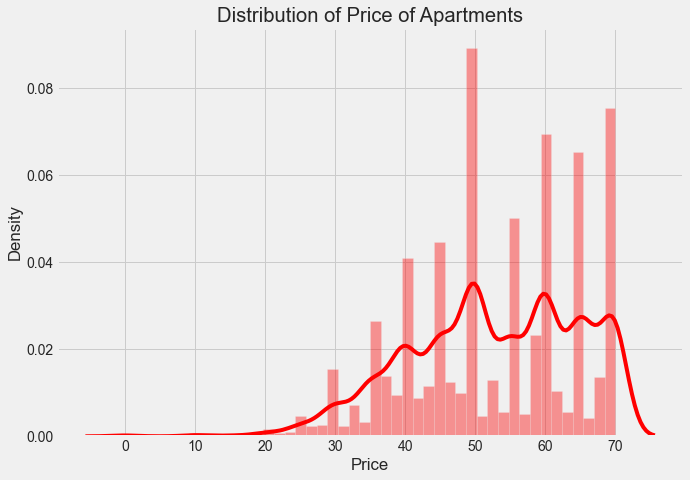

In [88]:
plt.figure(figsize=(10,7))
sns.distplot(df.price,color='r')
plt.xlabel("Price")
plt.title("Distribution of Price of Apartments")
plt.show()

Shapiro Test (for checking Normality)
H0 (Null Hypothesis) : Distribution is normal

H1 (Alternate Hypothesis): Distribution is not normal

In [89]:
import scipy.stats as st
st.shapiro(df.price)

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9598557949066162, pvalue=0.0)

The null hypothesis is disproved because the p value (0.0) is less than alpha (5%, as assumed).
The distribution is therefore abnormal (as cound be seen from the Distribution Plot above).
Theoretically, only non-parametric tests can be run on the data due to the non-normal distribution.

Price vs Room Type

In [90]:
df.room_type.unique()

array(['Private room', 'Shared room', 'Entire home/apt'], dtype=object)

In [91]:
pvt = df[df['room_type'] == 'Private room']
share = df[df['room_type'] == 'Shared room']
apt = df[df['room_type'] == 'Entire home/apt']

Levene Test (for testing of variance)
H0 (null hypothesis): variance(private_room) = variance(shared_room) = variance(entire_home)

H1 (alternate hypothesis): variance(private_room) != variance(shared_room) != variance(entire_home)

In [92]:
st.levene(pvt.price, share.price, apt.price)

LeveneResult(statistic=49.61921420134745, pvalue=3.5317216452802257e-22)

We reject H0 since the p value is almost zero (and consequently less than alpha = 0.05). 
As a result, there is a difference in the price variation across the various accommodation classifications.
This is demonstrated by looking at the boxplot below.

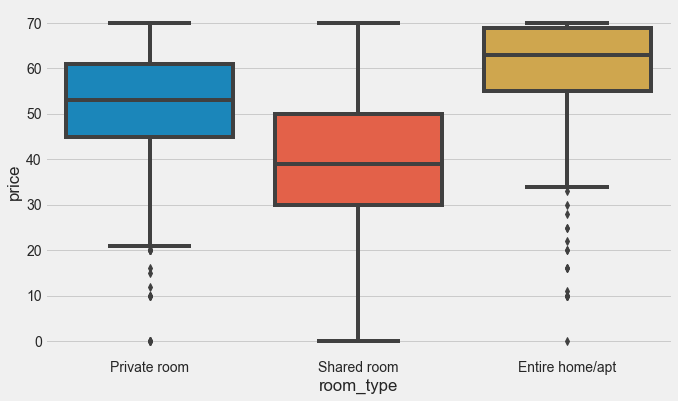

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(y='price',x='room_type',data=df)
plt.show()

Kruskal Wallis Test
H0 (null hypothesis): mean_price(private_room) = mean_price(shared_room) = mean_price(entire_home/apt)

H1 (alternate hypothesis): mean_price(private_room) != mean_price(shared_room) != mean_price(entire_home/apt)

In [94]:
st.kruskal(pvt.price,share.price,apt.price)

KruskalResult(statistic=742.9895655684982, pvalue=4.590561192620697e-162)

In [ ]:
P value alpha is present in the test result above (0.05). As a result, the null hypothesis is disproved. 
This suggests that there is a difference in the mean price of various types of apartments.
The barplot of the mean prices given below serves as confirmation.

In [95]:
ind = ['Private Rooms','Apartments','Shared Rooms']
x = pd.DataFrame([pvt.price.mean(),apt.price.mean(),share.price.mean()], index=ind)
x

,0
Private Rooms,52.883762
Apartments,59.867133
Shared Rooms,41.067797


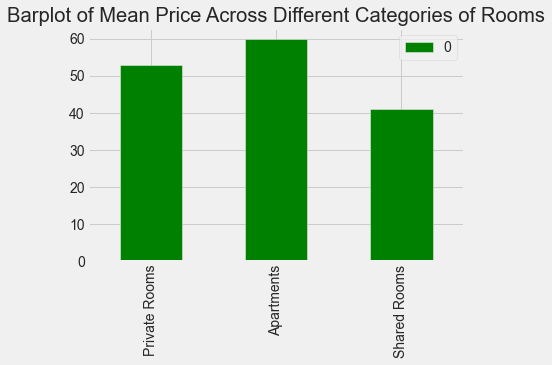

In [96]:
x.plot.bar(color='g')
plt.title("Barplot of Mean Price Across Different Categories of Rooms")
plt.show()

Conclusion: There is association between Price and Room Type. 
    The price is dependent on the type of room that a person chooses since the mean price across all types is not equal.

Theoretically, parametric tests cannot be conducted since the assumptions of normality and variance are broken,
but it is still possible to determine whether the parametric test (one way ANOVA) yields the same result in this situation.

One Way ANOVA
H0 (null hypothesis): mean_price(private_room) = mean_price(shared_room) = mean_price(entire_home/apt)

H1 (alternate hypothesis): mean_price(private_room) != mean_price(shared_room) != mean_price(entire_home/apt)

In [97]:
st.f_oneway(pvt.price,share.price,apt.price)

F_onewayResult(statistic=467.35135146471316, pvalue=1.791745132935069e-195)

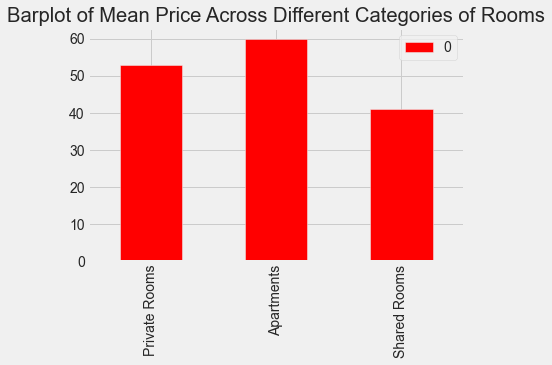

In [98]:
x.plot.bar(color='r')
plt.title("Barplot of Mean Price Across Different Categories of Rooms")
plt.show()

As a result, the null hypothesis is rejected in one direction of the ANOVA, indicating that the means of the prices
for the various types of rooms are not equal. For reference, the barplot is drawn once more.

Price vs Neighbourhood

In [99]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

The 'neighbourhood_group' is a categorical variable having more than two categories,
so we can perform either Kruskal Wallis test or One Way ANOVA test

Kruskal Wallis Test
H0 (null hypothesis): mean_price(Brooklyn) = mean_price(Manhattan) = ..... = mean_price(Bronx) (see categories above)

H1 (null hypothesis): mean_price(Brooklyn) != mean_price(Manhattan) != ..... != mean_price(Bronx)

In [100]:
a = df[df['neighbourhood_group'] == 'Brooklyn']['price']
b = df[df['neighbourhood_group'] == 'Manhattan']['price']
c = df[df['neighbourhood_group'] == 'Queens']['price']
d = df[df['neighbourhood_group'] == 'Staten Island']['price']
e = df[df['neighbourhood_group'] == 'Bronx']['price']

st.kruskal(a,b,c,d,e)

KruskalResult(statistic=322.7141214508977, pvalue=1.3614136201687707e-68)

We reject H0 because the p value is near to zero and less than alpha (0.05).
As a result, there is a difference in the mean price between various neighbourhood groupings.

conclusion : There is a relationship between pricing and neighbourhood group, 
meaning that the price depends on the neighbourhood group in which the house is offered.

One Way ANOVA
H0 (null hypothesis): mean_price(Brooklyn) = mean_price(Manhattan) = ..... = mean_price(Bronx)

H1 (null hypothesis): mean_price(Brooklyn) != mean_price(Manhattan) != ..... != mean_price(Bronx)

In [101]:
st.f_oneway(a,b,c,d,e)

F_onewayResult(statistic=83.0146211738172, pvalue=1.5105613221877892e-69)

We reject H0 because the p value is near to zero and smaller than alpha (similar to the Kruskal test). As a result, there is a difference in the mean price between various neighbourhood groupings.
The bar plot shown below demonstrates this.

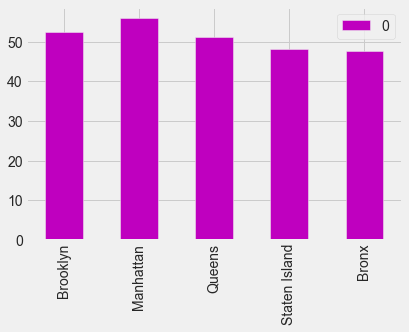

In [102]:
ind = ['Brooklyn','Manhattan','Queens','Staten Island','Bronx']
x = pd.DataFrame([a.mean(),b.mean(),c.mean(),d.mean(),e.mean()], index=ind)
x.plot.bar(color='m')
plt.show()

In [ ]:
Room Type vs Neighbourhood Group

Since both the variables Room Type and Neighbourhood Group are categorical having more than two categories,
we can peform Chi-squared test

Chi Squared Test
H0 (null hypothesis): There is no association between Room Type and Neighbourhood Group.
H1 (alternate hypothesis): There is an association between Room Type and Neighbourhood Group

In [103]:
tab = pd.crosstab(df['room_type'],df['neighbourhood_group'])

In [104]:
st.chi2_contingency(tab)

(125.11958310910624,
 2.899677174117976e-23,
 8,
 array([[  32.99395715,  376.6810108 ,  147.42537997,  148.08002197,
            9.8196301 ],
        [ 441.05768174, 5035.40853324, 1970.75773668, 1979.50888116,
          131.26716719],
        [  29.94836111,  341.91045596,  133.81688335,  134.41109687,
            8.91320271]]))

The p value obtained (2.899e-23) is less than alpha (0.05) and thus the null hypothesis is rejected.

Conclusion: There is association between Room Type and Neighbourhood Group implying that the proportion of availability
    of a particular type of room (private, shared, apartment) is dependent on the neighbourhood group in which we are searching.
    This can be verified from the stacked bar graph drawn below

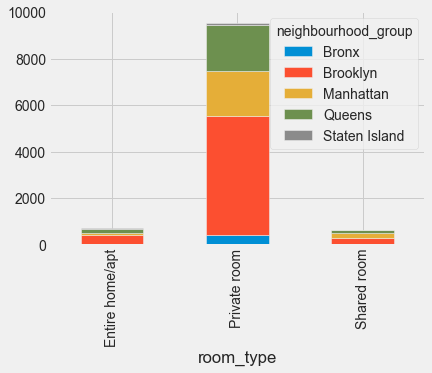

In [106]:
ct = pd.crosstab(df['room_type'],df['neighbourhood_group'])
ct.plot.bar(stacked=True)
plt.show()

Price vs Neighbourhood Group & Host Name

The constant parameter Price should be contrasted with the categorical variables Host Name and Neighborhood, 
both of which have more than two categories.
The two-way ANOVA test must be utilised as a result.

Price vs Neighbourhood Group
H0: Mean Price (neighbourhood_group 1) = Mean Price (neighbourhood_group 2) = .... = Mean Price (neighbourhood_group n)
H1: Mean Price (neighbourhood_group 1) != Mean Price (neighbourhood_group 2) != .... != Mean Price (neighbourhood_group n)
    
Price vs Host Name
H0: Mean Price (host_name 1) = Mean Price (host_name 2) = .... = Mean Price (host_name n)
H1: Mean Price (host_name 1) != Mean Price (host_name 2) != .... != Mean Price (host_name n

In [107]:
from statsmodels.formula.api import ols

In [108]:
model = ols("price~neighbourhood_group+host_name",data=df).fit()

In [109]:
from statsmodels.stats.anova import anova_lm
anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
neighbourhood_group,15996.312596,4.0,34.440759,1.640209e-28
host_name,732631.887119,3993.0,1.580154,7.915713e-62
Residual,803629.792739,6921.0,NaN,NaN


The p values of host name and neighbourhood group are less than alpha (0.05). 
This implies that the mean price of rooms with different neighbourhood groups and host names are not equal

Conclusion: The mean price of a room has an association with the name of its host and the neighbourhood group it belongs to.
    The price for a room with one host name in one neighbourhood group will be different from the price of a room with a 
    different host name in a different neighbourhood group

Correlation Between Continuous Variables

A heatmap can be used to check the correaltion between continuous variables in the dataset.

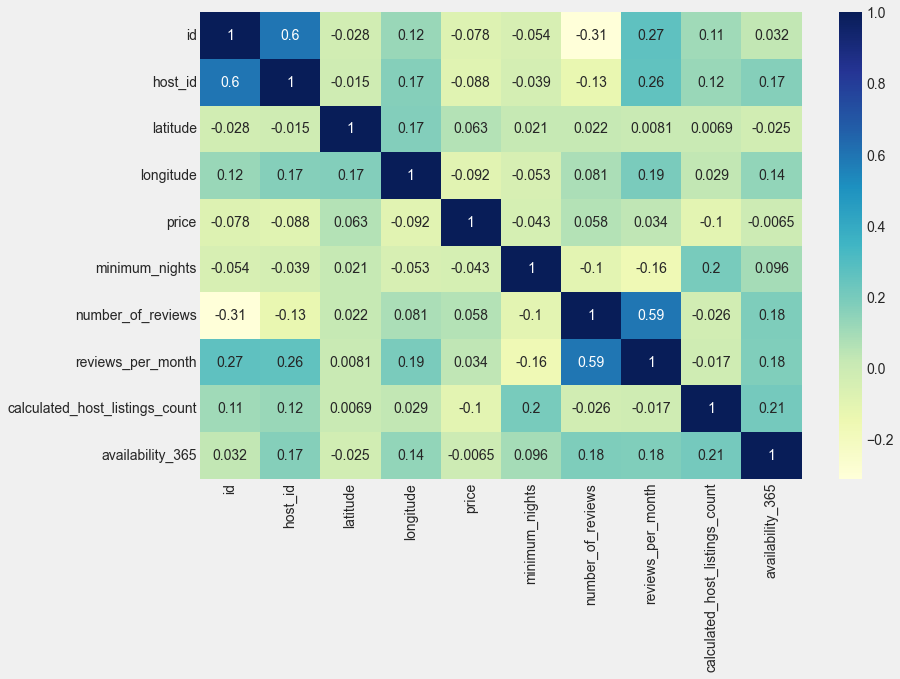

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

Observations: The host id and id have the strongest correlation (0.6), followed by the number of reviews and reviews per month,
    while the longitude and price have the lowest connection (-0.4). (-.092)..

Neighbourhood vs Neighbourhood Group

Both variables are categorical having more than two categories => perform chi-squared test

Chi-Squared Test
H0: There is no association between neigbourhood and neighbourhood groups.
H1: There is an association between neighbourhood and neighbourhood groups.

In [111]:
tab = pd.crosstab(df['neighbourhood'],df['neighbourhood_group'])
st.chi2_contingency(tab)

(43687.99999999999,
 0.0,
 784,
 array([[9.22907892e-01, 1.05365318e+01, 4.12378685e+00, 4.14209852e+00,
         2.74674968e-01],
        [9.22907892e-02, 1.05365318e+00, 4.12378685e-01, 4.14209852e-01,
         2.74674968e-02],
        [4.61453946e-01, 5.26826589e+00, 2.06189343e+00, 2.07104926e+00,
         1.37337484e-01],
        [6.92180919e-01, 7.90239883e+00, 3.09284014e+00, 3.10657389e+00,
         2.06006226e-01],
        [1.30591467e+01, 1.49091925e+02, 5.83515840e+01, 5.86106940e+01,
         3.88665080e+00],
        [3.23017762e-01, 3.68778612e+00, 1.44332540e+00, 1.44973448e+00,
         9.61362388e-02],
        [1.38436184e-01, 1.58047977e+00, 6.18568028e-01, 6.21314778e-01,
         4.12012452e-02],
        [1.89196118e+00, 2.15998901e+01, 8.45376305e+00, 8.49130196e+00,
         5.63083684e-01],
        [4.61453946e-02, 5.26826589e-01, 2.06189343e-01, 2.07104926e-01,
         1.37337484e-02],
        [4.61453946e-02, 5.26826589e-01, 2.06189343e-01, 2.07104926e-01,
    

Conclusion: The null hypothesis is rejected since the p value (0.0) is less than alpha (0.05). 
    Thus, there is association between neighbourhood and neighbourhood group (as can be expected). 
    This simply implies that the neighbourhood group is dependent upon the neighbourhood in which the house is present

CONCLUSION
1.A variety of hypothesis tests were run on the information.
2.Discover the relationships and dependencies between various variables.
3.compared the results of non-parametric (z proportions test, Mann Whitney test, Kruskal Wallis test, and Chi-squared test) and
parametric (one way and two way ANOVA) tests on the variables under study.
4.used boxplots, distribution plots, bar graphs, and stacked bar charts to visually represent and
confirm the results of the many experiments.

In [19]:
# comparing minimum nights,roomtype and number of reviews
df[['host_id','room_type','minimum_nights','number_of_reviews']]

,host_id,room_type,minimum_nights,number_of_reviews
0,2787,Private room,1,9
1,2845,Entire home/apt,1,45
2,4632,Private room,3,0
3,4869,Entire home/apt,1,270
4,7192,Entire home/apt,10,9
...,...,...,...,...
48890,8232441,Private room,2,0
48891,6570630,Private room,4,0
48892,23492952,Entire home/apt,10,0
48893,30985759,Shared room,1,0


people spend more nights in Entire home/apt and after that people spend their nights
private room.

Numbers of reviews according to room type

very less people booking in shared room more than 50 % of people take entire home/apt


In [22]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [23]:
# What can we learn about different hosts and areas
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)


,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Michael, David

In [24]:
# what can we learn from ( locations , price and reviews)
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


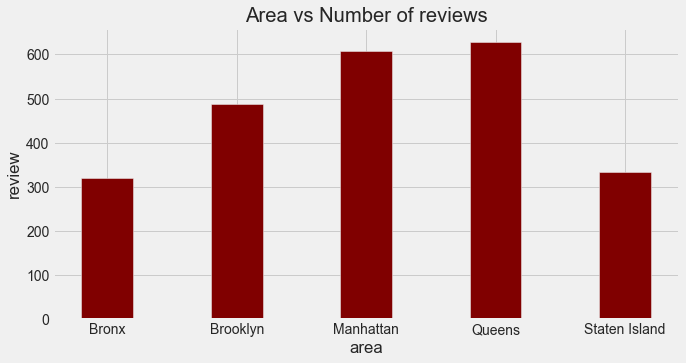

In [25]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [26]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


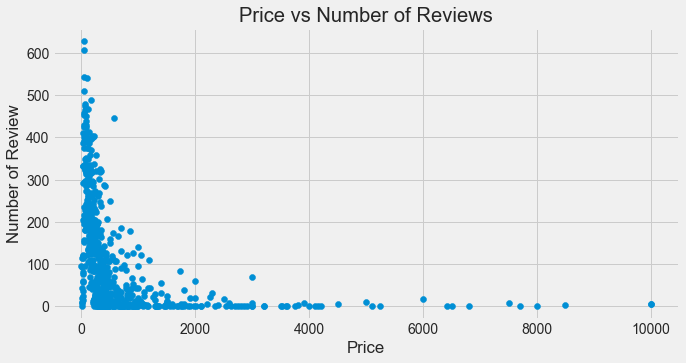

In [27]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

From the above Analysis we can say that most people prefer to stay in place where price is less.

In [28]:
# Which hosts are the busiest
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


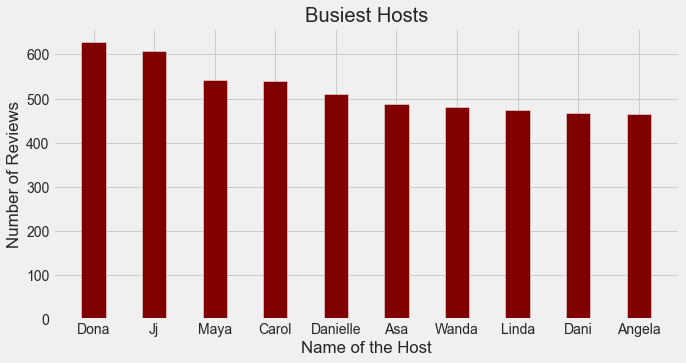

In [29]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

# Busiest hosts are:
# Dona
# Ji
# Maya
# Carol
# Danielle
Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

In [30]:
# Is there any noticeable difference of traffic among different areas and what could be the reason for it
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


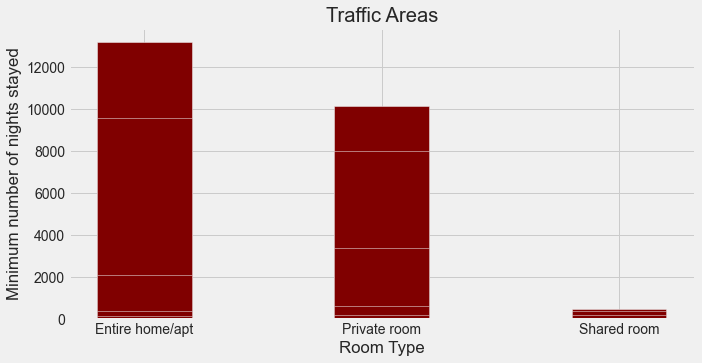

In [31]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price

# conclusion
#1.The people who prefer to stayin Entire home or Apartment they are going to stay bit longer in that particular 
Neighbourhood only
#2.The people who prefer to stay in Private room they do not stay longer as compared to Home or Apartment.
#3.Most people prefer to pay less price.
#4.If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
#5.If people are not staying more then one night means they are travellers.